## Question 1: Building the graph and loading the data

In [35]:
from graph import Graph

graph = Graph()

# adding the nodes (reading from a file)

with open('romania.txt', 'r') as file:
    while True:
        line = file.readline()
        if (line == ""):
            break
        # we use 4 spaces to separate the cities and numbers
        unpacked = line.split(sep="    ")
        city, lat, long = unpacked
        graph.addNode(city)



# adding the edges (manually)

graph.addUndirectedEdge("Oradea","Sibiu", 151, 151)
graph.addUndirectedEdge("Oradea","Zerind", 71, 71)
graph.addUndirectedEdge("Zerind","Arad", 75, 75)
graph.addUndirectedEdge("Arad","Sibiu", 140, 140)
graph.addUndirectedEdge("Arad","Timisoara", 118, 118)
graph.addUndirectedEdge("Timisoara","Lugoj", 111, 111)
graph.addUndirectedEdge("Lugoj","Mehadia", 70, 70)
graph.addUndirectedEdge("Mehadia","Drobeta", 75, 75)
graph.addUndirectedEdge("Craiova","Drobeta", 120, 120)
graph.addUndirectedEdge("Craiova","Rimnicu Vilcea", 146, 146)
graph.addUndirectedEdge("Giurgiu","Bucharest", 90, 90)
graph.addUndirectedEdge("Bucharest","Pitesti", 101, 101)
graph.addUndirectedEdge("Urziceni","Bucharest", 85, 85)
graph.addUndirectedEdge("Hirsova","Eforie", 86, 86)
graph.addUndirectedEdge("Hirsova","Urziceni", 98, 98)
graph.addUndirectedEdge("Vaslui","Iasi", 92, 92)
graph.addUndirectedEdge("Vaslui","Urziceni", 142, 142)
graph.addUndirectedEdge("Neamt","Iasi", 87, 87)
graph.addUndirectedEdge("Rimnicu Vilcea","Sibiu", 80, 80)
graph.addUndirectedEdge("Rimnicu Vilcea","Pitesti", 97, 97)
graph.addUndirectedEdge("Fagaras","Sibiu", 99, 99)
graph.addUndirectedEdge("Fagaras","Bucharest", 211, 211)
graph.addUndirectedEdge("Pitesti","Craiova", 138, 138)

graph.show()

{'Arad': [('Zerind', 75), ('Sibiu', 140), ('Timisoara', 118)],
 'Bucharest': [('Giurgiu', 90),
               ('Pitesti', 101),
               ('Urziceni', 85),
               ('Fagaras', 211)],
 'Craiova': [('Drobeta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)],
 'Drobeta': [('Mehadia', 75), ('Craiova', 120)],
 'Eforie': [('Hirsova', 86)],
 'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
 'Giurgiu': [('Bucharest', 90)],
 'Hirsova': [('Eforie', 86), ('Urziceni', 98)],
 'Iasi': [('Vaslui', 92), ('Neamt', 87)],
 'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
 'Mehadia': [('Lugoj', 70), ('Drobeta', 75)],
 'Neamt': [('Iasi', 87)],
 'Oradea': [('Sibiu', 151), ('Zerind', 71)],
 'Pitesti': [('Bucharest', 101), ('Rimnicu Vilcea', 97), ('Craiova', 138)],
 'Rimnicu Vilcea': [('Craiova', 146), ('Sibiu', 80), ('Pitesti', 97)],
 'Sibiu': [('Oradea', 151),
           ('Arad', 140),
           ('Rimnicu Vilcea', 80),
           ('Fagaras', 99)],
 'Timisoara': [('Arad', 118), ('Lugoj', 111)],
 

#### As we can see in the above cell, the Graph library we implemented allows us to:

 1. create a node
 2. insert and delete edges and nodes
 3. search for an item in the graph
 4. loading the graph data presented on page 83rd of the textbook

The implementation of the Graph class can be found in the 'graph.py' file.
The tests for the Graph class can be found in the 'test_graph.py' file. The test code showcases a variety of operations on the graph.

## Question 2: Benchmarking search algorithms on 10 randomly picked cities

In [36]:
# a function to give us a random node from a graph whenever we need it
import random
def getRandomNode(graph):
    num = random.random()
    transformed = int(num*len(graph.adjacencyList.keys()))
    return list(graph.adjacencyList.keys())[transformed]

In [37]:
# we'll be using this context manager to measure execution time throughout this assignment.

from time import time
class Timer():
    def __init__(self, timeKeeper):
        self.startTime = None
        self.endTime = None
        self.timeKeeper = timeKeeper
    def __enter__(self):
        self.startTime = time()
        
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.endTime = time()
        self.timeKeeper["interval"] = self.endTime - self.startTime


In [38]:
# let's collect the 10 randomly selected cities we'll need to do
# benchmarking (for the 1st part of question 2)

randomly_selected_cities = set()

for _ in range(10):
    selectedCity = getRandomNode(graph)
    while(selectedCity in randomly_selected_cities):
        selectedCity = getRandomNode(graph)
    randomly_selected_cities.add(selectedCity)
randomly_selected_cities = list(randomly_selected_cities)

print(randomly_selected_cities)

['Oradea', 'Lugoj', 'Eforie', 'Giurgiu', 'Urziceni', 'Pitesti', 'Arad', 'Iasi', 'Timisoara', 'Mehadia']


In [39]:
# let's make up the 100 (actually, 90) paths out of the 10 cities
all_paths = []
for start in randomly_selected_cities:
    for end in randomly_selected_cities:
        if start == end:
            continue
        all_paths.append((start, end))

len(all_paths)


90

In [40]:
# let's make a structure to organize and store the experiment data

# There will be 100 paths. for each path, there will be 10 experiments.
# each experiment will contain times and costs for the different algorithms.

data = {                        # data will contain everything
    path: [                                 # path is a key. it's a tuple(startCity, destCity)
        {                                   # the value is a list of 10 dictionaries containing measured times and costs for the 10 experiments
            'times': {                      
                'bfs': 0,                  # the value of "times" is a map from search name to time recorded for that search in this experiment
                'dfs': 0,
                'ucs': 0,
                'greedy': 0,
                'id': 0,
                'bds': 0,
                'a*' : 0,
            },
            'costs': {
                'bfs': 0,
                'dfs': 0,
                'ucs': 0,
                'greedy': 0,
                'id': 0,
                'bds': 0,
                'a*': 0,
            },
        }
        for experiment in range(10)
    ]
    for path in all_paths
}


In [41]:
# now let's do the experiments and populate the data
from heuristic import Heuristic
heuristic = Heuristic()

for path in data:
    for ex in range(len(data[path])):
        # let's do dfs and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.dfs(path[0], path[1])
            data[path][ex]['costs']['dfs'] = results["cost"]
        data[path][ex]['times']['dfs'] = timeKeeper['interval']

        # let's do bfs and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.bfs(path[0], path[1])
            data[path][ex]['costs']['bfs'] = results["cost"]
        data[path][ex]['times']['bfs'] = timeKeeper['interval']

        # let's do ucs and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.ucs(path[0], path[1])
            data[path][ex]['costs']['ucs'] = results["cost"]
        data[path][ex]['times']['ucs'] = timeKeeper['interval']

        # let's do iterative deepening and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.iterativeDeepeningSearch(path[0], path[1])
            data[path][ex]['costs']['id'] = results["cost"]
        data[path][ex]['times']['id'] = timeKeeper['interval']

        # let's do bi-directional search and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.bidirectionalSearch(path[0], path[1])
            data[path][ex]['costs']['bds'] = results["cost"]
        data[path][ex]['times']['bds'] = timeKeeper['interval']

        # let's do greedy search and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.greedySearch(path[0], path[1], heuristic=heuristic.distance)
            data[path][ex]['costs']['greedy'] = results["cost"]
        data[path][ex]['times']['greedy'] = timeKeeper['interval']

        # let's do A* search and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.aStarSearch(path[0], path[1], heuristic=heuristic.distance)
            data[path][ex]['costs']['a*'] = results["cost"]
        data[path][ex]['times']['a*'] = timeKeeper['interval']


In [61]:
# a sneak peek of the experiment data ... but it's too large to be printed here.
# open it in a text editor if you want to see the whole thing.

from pprint import pprint
pprint(data)

{('Arad', 'Eforie'): [{'costs': {'a*': 687,
                                 'bds': 719,
                                 'bfs': 719,
                                 'dfs': 1388,
                                 'greedy': 719,
                                 'id': 874,
                                 'ucs': 687},
                       'times': {'a*': 0.00038313865661621094,
                                 'bds': 0.0001823902130126953,
                                 'bfs': 0.00024247169494628906,
                                 'dfs': 6.031990051269531e-05,
                                 'greedy': 0.0002453327178955078,
                                 'id': 4.0531158447265625e-05,
                                 'ucs': 0.0002841949462890625}},
                      {'costs': {'a*': 687,
                                 'bds': 719,
                                 'bfs': 719,
                                 'dfs': 1388,
                                 'greedy': 719,
       

In [43]:
# let's calculate average times for each search type over the 10 experiments in order to
# mitigate chaotic CPU time fluctuation, and store the average data in a separate structure.

avg_data = {}

for path, experiments in data.items():
    avg_times = {}
    costs = {}
    for search_type in experiments[0]['times'].keys():
        total_time = 0
        for experiment in experiments:
            total_time += experiment['times'][search_type]
        avg_times[search_type] = total_time / len(experiments)
        costs[search_type] = experiments[0]['costs'][search_type]
    avg_data[path] = {'avg_times': avg_times, 'costs': costs}

In [63]:
# a sneak peek of the averaged data over the 10 experiments
pprint(avg_data)

{('Arad', 'Eforie'): {'avg_times': {'a*': 0.0003331899642944336,
                                    'bds': 0.00017514228820800782,
                                    'bfs': 0.0003144264221191406,
                                    'dfs': 5.512237548828125e-05,
                                    'greedy': 0.0001701831817626953,
                                    'id': 5.1021575927734375e-05,
                                    'ucs': 0.00034072399139404295},
                      'costs': {'a*': 687,
                                'bds': 719,
                                'bfs': 719,
                                'dfs': 1388,
                                'greedy': 719,
                                'id': 874,
                                'ucs': 687}},
 ('Arad', 'Giurgiu'): {'avg_times': {'a*': 0.00019974708557128905,
                                     'bds': 9.012222290039062e-05,
                                     'bfs': 0.0001277923583984375,
                    

### plotting the performance and cost of search algorithms on a few select paths

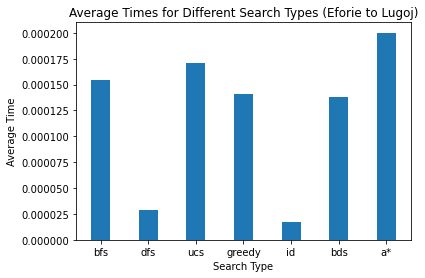

In [64]:
# on some select paths, we plot the performance (in time) and costs of these search algorithms.

# Arad - Bucharest
import matplotlib.pyplot as plt

path = all_paths[19]
avg_times = avg_data[path]['avg_times']

search_types = list(avg_times.keys())
times = list(avg_times.values())

plt.bar(search_types, times, width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Average Time')
plt.title(f'Average Times for Different Search Types ({path[0]} to {path[1]})')
plt.show()

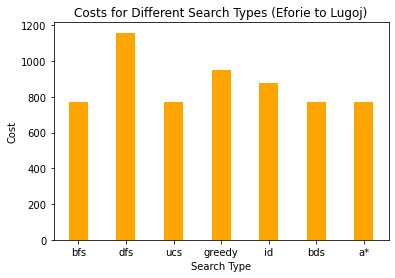

In [65]:
# plotting the costs ... 

path = all_paths[19]
costs = avg_data[path]['costs']

search_types = list(costs.keys())
costs = list(costs.values())

plt.bar(search_types, costs, color='orange', width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Cost')
plt.title(f'Costs for Different Search Types ({path[0]} to {path[1]})')
plt.show()

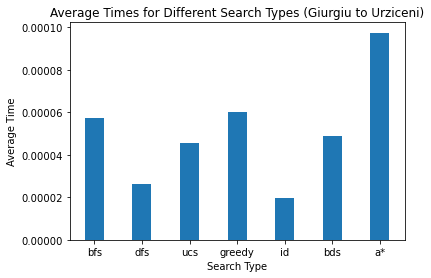

In [66]:
# on some select paths, we plot the performance (in time) and costs of these search algorithms.

path = all_paths[30]
avg_times = avg_data[path]['avg_times']

search_types = list(avg_times.keys())
times = list(avg_times.values())

plt.bar(search_types, times, width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Average Time')
plt.title(f'Average Times for Different Search Types ({path[0]} to {path[1]})')
plt.show()

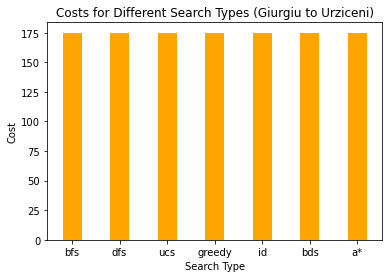

In [67]:
# plotting the costs ... 

path = all_paths[30]
costs = avg_data[path]['costs']

search_types = list(costs.keys())
costs = list(costs.values())

plt.bar(search_types, costs, color='orange', width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Cost')
plt.title(f'Costs for Different Search Types ({path[0]} to {path[1]})')
plt.show()

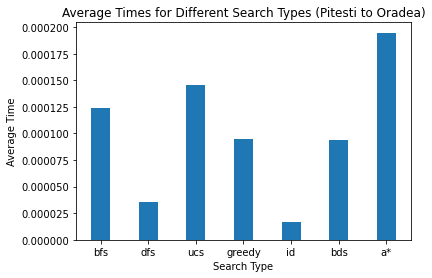

In [71]:
# on some select paths, we plot the performance (in time) and costs of these search algorithms.

path = all_paths[45]
avg_times = avg_data[path]['avg_times']

search_types = list(avg_times.keys())
times = list(avg_times.values())

plt.bar(search_types, times, width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Average Time')
plt.title(f'Average Times for Different Search Types ({path[0]} to {path[1]})')
plt.show()

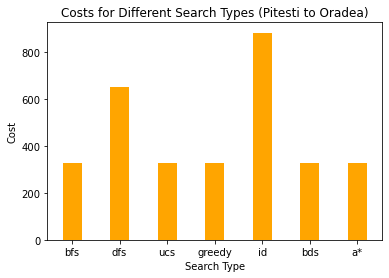

In [70]:
# plotting the costs ... 

path = all_paths[45]
costs = avg_data[path]['costs']

search_types = list(costs.keys())
costs = list(costs.values())

plt.bar(search_types, costs, color='orange', width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Cost')
plt.title(f'Costs for Different Search Types ({path[0]} to {path[1]})')
plt.show()

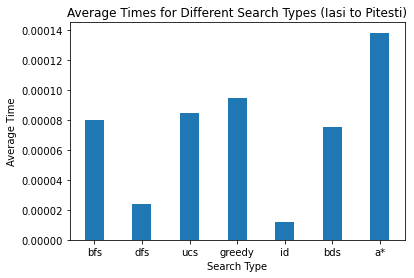

In [74]:
# on some select paths, we plot the performance (in time) and costs of these search algorithms.

path = all_paths[68]
avg_times = avg_data[path]['avg_times']

search_types = list(avg_times.keys())
times = list(avg_times.values())

plt.bar(search_types, times, width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Average Time')
plt.title(f'Average Times for Different Search Types ({path[0]} to {path[1]})')
plt.show()

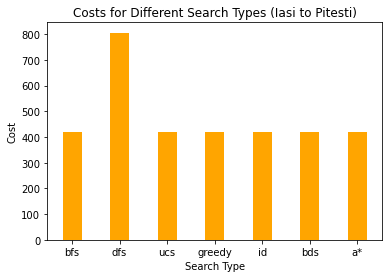

In [73]:
# plotting the costs ... 

path = all_paths[68]
costs = avg_data[path]['costs']

search_types = list(costs.keys())
costs = list(costs.values())

plt.bar(search_types, costs, color='orange', width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Cost')
plt.title(f'Costs for Different Search Types ({path[0]} to {path[1]})')
plt.show()

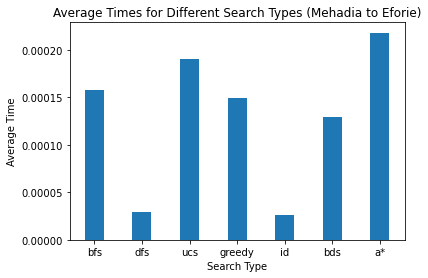

In [75]:
# on some select paths, we plot the performance (in time) and costs of these search algorithms.

path = all_paths[83]
avg_times = avg_data[path]['avg_times']

search_types = list(avg_times.keys())
times = list(avg_times.values())

plt.bar(search_types, times, width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Average Time')
plt.title(f'Average Times for Different Search Types ({path[0]} to {path[1]})')
plt.show()

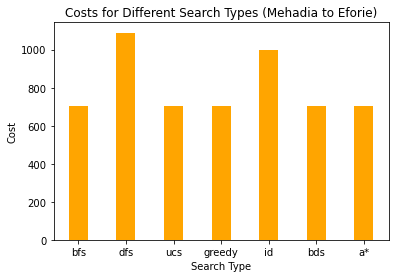

In [76]:
# plotting the costs ... 

path = all_paths[83]
costs = avg_data[path]['costs']

search_types = list(costs.keys())
costs = list(costs.values())

plt.bar(search_types, costs, color='orange', width=0.4)
plt.xlabel('Search Type')
plt.ylabel('Cost')
plt.title(f'Costs for Different Search Types ({path[0]} to {path[1]})')
plt.show()

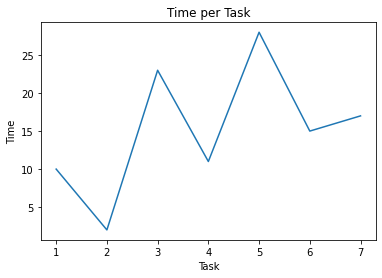

In [ ]:
import matplotlib.pyplot as plt

tasks = [1, 2, 3, 4, 5, 6, 7]
times = [10, 2, 23, 11, 28, 15, 17]

plt.plot(tasks, times)
plt.xlabel('Task')
plt.ylabel('Time')
plt.title('Time per Task')
plt.show()

In [ ]:
def populateGraph(graph: Graph, numNodes: int, numEdges: int, maxCost=1):
    # add nodes to the graph
    for i in range(numNodes):
        graph.addNode(str(i))
    # add edges to the graph
    for i in range(numEdges):
        node1 = str(random.randint(0, numNodes - 1))
        node2 = str(random.randint(0, numNodes - 1))
        cost = random.randint(1, maxCost)
        # make sure we don't add a self-loop or duplicate edge
        while node1 == node2 or graph.undirectedEdgeExists(node1, node2):
            node1 = str(random.randint(0, numNodes - 1))
            node2 = str(random.randint(0, numNodes - 1))
            cost = random.randint(1, maxCost)
        graph.addUndirectedEdge(node1, node2, cost, cost)

In [ ]:
bigGraph = Graph()
populateGraph(bigGraph, numNodes=100000, numEdges=200000)

In [ ]:
node1 = getRandomNode(graph)
node2 = getRandomNode(graph)
while(node1 == node2):
    node2 = getRandomNode(bigGraph)
print("dfs:")
with Timer():
    result = graph.dfs(node1, node2)
    print(result["path"], "\n", result["cost"])

print()

print("ucs:")
with Timer():
    result = graph.ucs(node1, node2)
    print(result["path"], "\n", result["cost"])

print()

print("bfs:")
with Timer():
    result = graph.bfs(node1, node2)
    print(result["path"], "\n", result["cost"])



dfs:


TypeError: Timer.__init__() missing 1 required positional argument: 'timeKeeper'

[('20778', 1), ('89025', 1), ('22139', 1), ('31929', 1)]

In [ ]:
random.randint(1,1)

1